# Checking data from the file

In [78]:
import pandas as pd

math_data = pd.read_csv('./student_data/student/student-mat.csv', delimiter=';')
por_data = pd.read_csv('./student_data/student/student-por.csv', delimiter=';')

# print(math_data.tail())
# print(por_data.tail())

combined_data = pd.concat([math_data,por_data], ignore_index=True)
combined_data

# Checking if there are students whose age is 22. Answer: yes.

# for i in combined_data['age']:
#     if(i == 22):
#         print("yes")

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
1042,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


## Understand what one-hot-encoding is and why I have used it here.
``Explanation``:

### Using one-hot-encoding to convert categorical and binary values 

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Checking the data types of the variables
# print(combined_data.dtypes)

# Using one-hot-encoding
combined_data = pd.get_dummies(combined_data, columns=['school','G1','G2','address','famsize','Pstatus','Mjob','Fjob','reason','guardian'])


### Mapping yes and no as well as Male and female to their binary representation

In [80]:
# Mapping yes and no to 1 and 0 as well as Male and female to 1 and 0
combined_data['sex'] = combined_data['sex'].map({'F':0,'M':1})
# 'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic'
combined_data['romantic'] = combined_data['romantic'].map({'yes':1,'no':0})
combined_data['schoolsup'] = combined_data['schoolsup'].map({'yes':1,'no':0})
combined_data['famsup'] = combined_data['famsup'].map({'yes':1,'no':0})
combined_data['paid'] = combined_data['paid'].map({'yes':1,'no':0})
combined_data['activities'] = combined_data['activities'].map({'yes':1,'no':0})
combined_data['nursery'] = combined_data['nursery'].map({'yes':1,'no':0})
combined_data['higher'] = combined_data['higher'].map({'yes':1,'no':0})
combined_data['internet'] = combined_data['internet'].map({'yes':1,'no':0})
combined_data

,sex,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,18,4,4,2,2,0,1,0,0,...,False,False,True,True,False,False,False,False,True,False
1,0,17,1,1,1,2,0,0,1,0,...,True,False,False,True,False,False,False,True,False,False
2,0,15,1,1,1,2,3,1,0,1,...,True,False,False,False,False,True,False,False,True,False
3,0,15,4,2,1,3,0,0,1,1,...,False,True,False,False,True,False,False,False,True,False
4,0,16,3,3,1,2,0,0,1,1,...,True,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,19,2,3,1,3,1,0,0,0,...,True,False,False,True,False,False,False,False,True,False
1040,0,18,3,1,1,2,0,0,1,0,...,False,True,False,True,False,False,False,False,True,False
1041,0,18,1,1,2,2,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False
1042,1,17,3,1,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


### Exploratory data analysis
Before this though, I am storing the columns names in a variable to use it dynamically in the pairplot

In [81]:
columns_names = combined_data.columns.tolist()
columns_names[0:10]
print(len(columns_names))

83


<Figure size 1000x500 with 0 Axes>

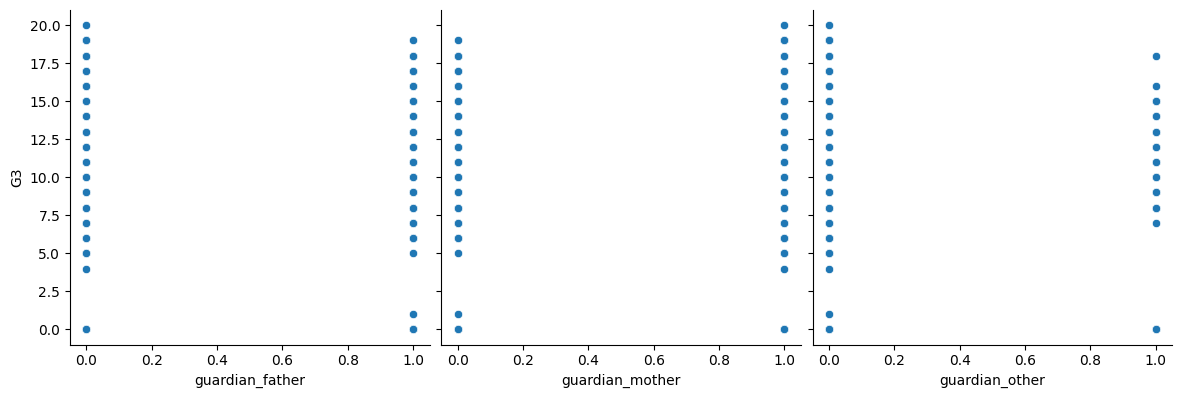

In [82]:
# scattered plot between TV-Sales, Newspaper-Sales, Radio-Sales
combined_data

plt.figure(figsize=(10,5))
sns.pairplot(combined_data, x_vars=columns_names[80:85], y_vars='G3', height=4, aspect=1, kind='scatter')
plt.show()

### Finding the correlation of each variable with target variable

In [83]:
correlation_matrix = combined_data.corr()
target_correlation = correlation_matrix['G3']

# Filtering out the correlation within a certain range to see
filtered_correlation = target_correlation[(target_correlation.abs() >= 0.1)]
print(len(filtered_correlation))

filtered_correlation[40:50]

48


G2_18                0.273858
G2_19                0.126959
address_R           -0.117696
address_U            0.117696
Mjob_at_home        -0.107951
Mjob_health          0.101349
Fjob_teacher         0.101361
reason_reputation    0.121303
Name: G3, dtype: float64

#### Deleting the ones which doesn't seem to pose that much of an impact


In [84]:
# del filtered_correlation['school_GP']
# del filtered_correlation['age']
# del filtered_correlation['school_MS']
# del filtered_correlation['reason_reputation']

filtered_correlation['activities'] = target_correlation['activities']
filtered_correlation['romantic'] = target_correlation['romantic']

filtered_correlation['health'] = target_correlation['health']
filtered_correlation['absences'] = target_correlation['absences']
filtered_correlation['guardian_other'] = target_correlation['guardian_other']
list_of_columns = list(filtered_correlation.keys())

## Building a multiple linear regression model
- Preparing train-test dataset
- Building model
- Evaluating the model

### Preparing train-test dataset

In [93]:
from sklearn.model_selection import train_test_split

# Define features(x) and target(y)
x = combined_data[list_of_columns]
y = combined_data['G3']

#Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 
 
'''
We have taken 20% of data from data frame for testing whereas the rest for training the model. 
The random state if set as true would return a random 20% data set from the data frame 
'''

x_train

,age,Medu,Fedu,traveltime,studytime,failures,higher,internet,Dalc,Walc,...,address_U,Mjob_at_home,Mjob_health,Fjob_teacher,reason_reputation,activities,romantic,health,absences,guardian_other
531,16,2,1,4,1,0,1,0,1,1,...,True,True,False,False,False,0,0,2,4,False
256,17,4,2,1,4,0,1,1,1,1,...,True,False,False,False,True,1,0,4,6,False
350,19,1,1,3,2,3,1,1,3,3,...,False,False,False,False,False,0,0,2,8,True
60,16,4,4,1,2,0,1,0,2,3,...,False,False,True,True,False,1,0,4,6,False
930,15,1,2,3,2,0,1,0,1,3,...,False,False,False,False,False,1,0,5,11,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,15,4,2,1,3,0,1,1,1,3,...,True,False,False,False,True,1,0,1,4,False
330,18,2,2,1,4,0,1,1,2,4,...,True,False,False,False,False,1,0,5,2,False
466,15,4,2,1,4,0,1,1,1,1,...,True,False,False,False,False,0,0,3,0,False
121,15,2,2,1,4,0,1,1,1,2,...,True,False,False,False,False,1,0,5,6,False


### Building model

In [86]:
from sklearn.linear_model import LinearRegression

# Initialize the model using LinearRegression class
sales_model = LinearRegression()

# Fit data to the model
sales_model.fit(x_train, y_train)

# Print the coefficients
print("Coefficients: ",sales_model.coef_)
print("Intercept: ",sales_model.intercept_)

Coefficients:  [-1.15571520e-16 -1.11022302e-16 -2.77555756e-16  2.22044605e-16
 -6.38378239e-16 -7.80625564e-16 -1.74860126e-15  1.47104551e-15
  3.74700271e-16 -6.17561557e-16  1.00000000e+00  2.42861287e-16
 -5.30401867e-16  6.29704622e-15  3.97338412e-15  3.12250226e-16
 -1.32532874e-15 -1.31838984e-16 -1.24900090e-16  4.44089210e-16
 -6.27969898e-16  4.76181594e-16 -9.36750677e-16  3.15719673e-16
  2.71202331e-15  6.88685220e-16 -1.13364179e-14  4.06966127e-15
  5.96744876e-16  1.24986826e-15  1.23139448e-15  1.07552856e-15
 -5.11743425e-16 -3.68628739e-16  9.01188846e-16 -6.75756109e-16
 -6.76542156e-17 -2.85362012e-16  1.95590072e-16 -2.45983789e-15
 -1.53956708e-15 -3.41046635e-15  8.89045781e-18  1.08420217e-17
 -3.31332184e-16 -7.13188189e-16  1.76508114e-16  2.19550940e-18
  1.86482774e-16 -3.05311332e-16 -9.54097912e-18  3.46944695e-17
 -2.48759346e-15]
Intercept:  -1.0658141036401503e-14


### Evaluating the model

In [94]:
from sklearn.metrics import mean_squared_error

# Make prediction
y_pred = sales_model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error is: ", mse)

Mean squared error is:  3.064994179179169e-29
